# Harleen Kaur

## Task 1: Predict the percentage of an student based on the no. of study hours.


### Importing the data using pandas library.

In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

### Exploring the data

In [3]:
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Checking for missing data

In [7]:
data.isnull().value_counts()

Hours  Scores
False  False     25
dtype: int64

### Visualizing the values

In [8]:
import seaborn as sns

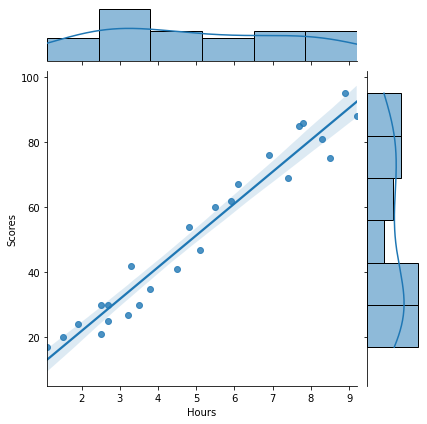

In [9]:
sns.jointplot(x='Hours',y='Scores',data=data,kind='reg')

### It shows that there is positive correlation between scores and hours

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

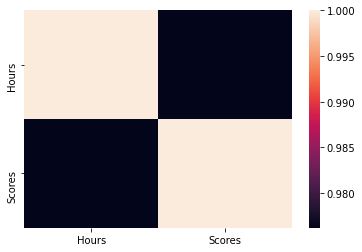

In [11]:
sns.heatmap(data.corr())

D:\myanaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

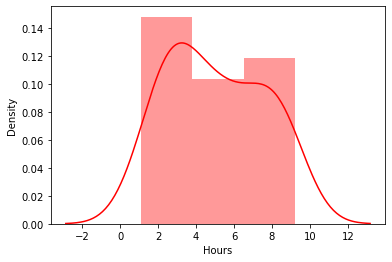

In [12]:
sns.distplot(data['Hours'],color='red') 

### It shows that large number of students study for 2-4 hours . 

D:\myanaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

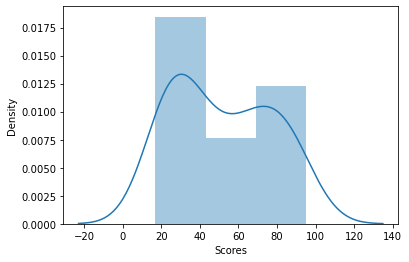

In [13]:
sns.distplot(data['Scores']) 

### It shows that large of students score between 20 to 40 .

### Dividing the data in input variables and prediction variable.

In [14]:
X= data['Hours']
Y=data['Scores']

In [15]:
type(X)

pandas.core.series.Series

In [16]:
X.shape

(25,)

In [17]:
X=pd.DataFrame(X)

In [18]:
Y=pd.DataFrame(Y)

### Splitting the train and test data.

In [19]:
from sklearn.model_selection import train_test_split  

In [20]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


### Training the model

In [22]:
from sklearn import linear_model as lm

In [23]:
b=lm.LinearRegression()
a=b.fit(X_train,Y_train)

### Making predictions on X_train

In [24]:
pred=b.predict(X_train)

In [25]:
pred.shape

(20, 1)

In [26]:
print(b.coef_)
print(b.intercept_)

[[9.91065648]]
[2.01816004]


###  Finding root mean squared error (rmse) after  training the model 

In [27]:
import sklearn

In [28]:
import math

In [29]:
mse=sklearn.metrics.mean_squared_error(Y_train, pred)
rmse = math.sqrt(mse)
print(rmse)

5.558613350226342


### Making predictions on X_test

In [30]:
Predicted_percentage = a.predict(X_test)

In [31]:
Predicted_percentage

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### Finding the rmse 

In [32]:
mse=sklearn.metrics.mean_squared_error(Y_test, Predicted_percentage)
rmse = math.sqrt(mse)
print(rmse)

4.6474476121003665


In [34]:
Y_test=Y_test.to_numpy()


In [35]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [36]:
Predicted_percentage

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [37]:
stud_score=a.predict([[9.25]]).reshape(-1,1)
stud_score.item()

93.69173248737538

### Visualizing actual and predicted scores

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
labels=['Actual','Predicted']

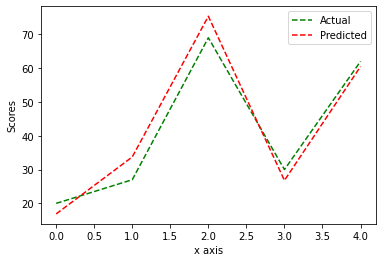

In [40]:
plt.plot(Y_test,'g--')
plt.plot(Predicted_percentage,'r--')
plt.legend(labels)
plt.xlabel('x axis')
plt.ylabel('Scores')
plt.show()

## THANK YOU